# NB Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

<br><hr><hr><br>

# Sigmoid (Logistic) Function

* For a classification task, a linear regression model can be made to predict $\quad y \quad$  and $\quad x$: $\quad f_{(\mathbf{w},b)}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$

* In order to make the predicitons of the model be between `0` and `1`, a *sigmoid function* can be used, which parses all input values in a `[0-1]` interval

$$\text {Formula for sigmoid function:}$$

$$g(z) = \frac{1}{1+e^{-z}}$$

* where:
    * $z$ = sigmoid input, which in case of logistic regreesion, is the output of $f_{(\mathbf{w},b)}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$
    * $e$ = euler's number (`~2.718`)

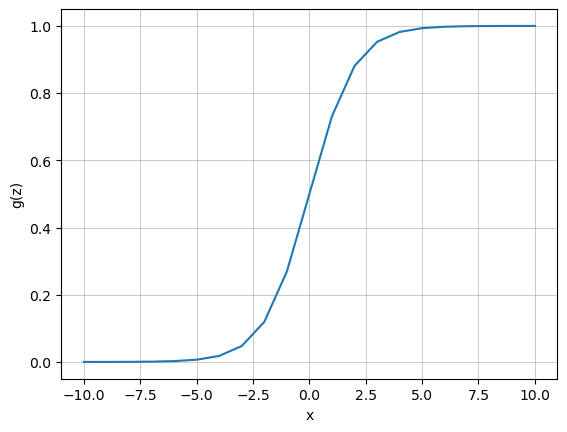

In [6]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g


x = np.arange(-10, 11)
y = sigmoid(x)

plt.plot(x, y)
plt.grid(color="0.7", ls="-", lw=.5)
plt.xlabel("x")
plt.ylabel("g(z)")
plt.show()

<br><hr><hr><br>

# Decision Boundary

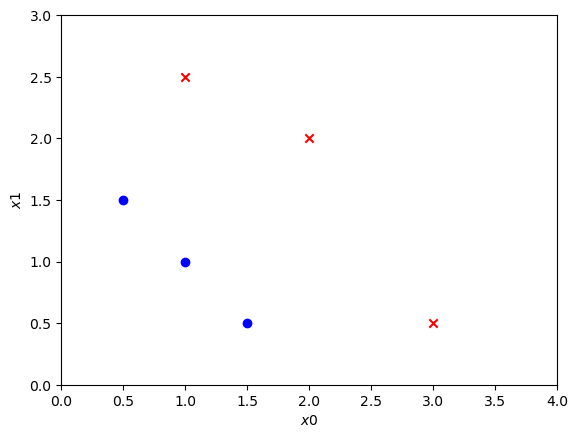

In [9]:
X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

first_half = X[:3, :]
second_half = X[3:, :]

plt.scatter(first_half[:, 0], first_half[:, 1], c="blue", marker="o")
plt.scatter(second_half[:, 0], second_half[:, 1], c="red", marker="x")
plt.xlabel(r"$x0$")
plt.ylabel(r"$x1$")
plt.xlim(0, 4)
plt.ylim(0, 3)
plt.show()

<br><hr><br>

## Logistic Regression Model

* Training a logisitc regression on is data of the form $\quad f(x) = g(w_0x_0 + w_1x_1 + b) \quad$ where sigmoid function is $ \quad g(z) = \frac{1}{1+e^{-z}} \quad$

* Example of trained model parameters: $\quad b = -3, w_0 = 1, w_1 = 1 \quad$ which is $ \quad f(x) = g(x_0+x_1-3)$

* We interpret the output of the model $\quad f_{(\mathbf{w},b)}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b \quad$ as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
    * To get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic:

  $$\text{if} \quad f_{\mathbf{w},b}(x) \geq 0.5 \quad \text{predict y = 1}$$

  $$\text{if} \quad f_{\mathbf{w},b}(x) < 0.5 \quad \text{predict y = 0}$$

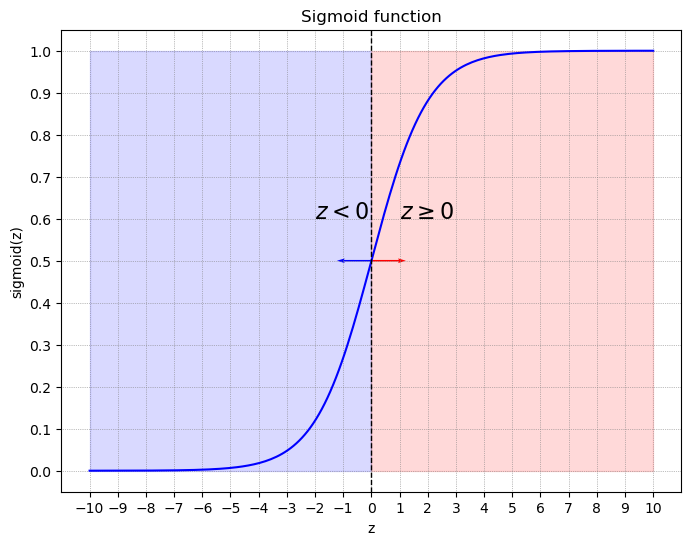

In [12]:
z = np.linspace(-10, 10, 200)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(z, sigmoid(z), c="blue")
ax.set_title("Sigmoid function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel("z")
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_xticks(np.arange(-10, 11, 1))
ax.grid(color="0.9", ls="-", lw=.5)

ax.axvline(0, color="black", ls="--", lw=1)
ax.grid(color="0.5", ls=":", lw=.5)

# fill left side (z < 0) with blue across full y-range
ax.fill_betweenx(y=np.linspace(0, 1, 100), x1=-10, x2=0, color="blue", alpha=0.15)
ax.quiver(0, 0.5, -1, 0, width=0.0025, color="blue")
ax.text(-2, 0.6, r"$z < 0$", fontsize=16)

# fill right side (z > 0) with red across full y-range
ax.fill_betweenx(y=np.linspace(0, 1, 100), x1=0, x2=10, color="red", alpha=0.15)
ax.quiver(0, 0.5, 1, 0, width=0.0025, color="red")
ax.text(1, 0.6, r"$z \geq 0$", fontsize=16)

plt.show()

<br><hr><br>

## Plotting decision boundary

* The above Logistic Regression model has the form $\quad f(\mathbf{x}) = g(-3 + x_0+x_1) \quad$
    * Which predicts $\quad y=1 \quad \text{if} \quad -3 + x_0+x_1 \ge 0$
    * Where: $\quad -3 + x_0 + x_1 \quad => \quad x_1 = 3 - x_0 $


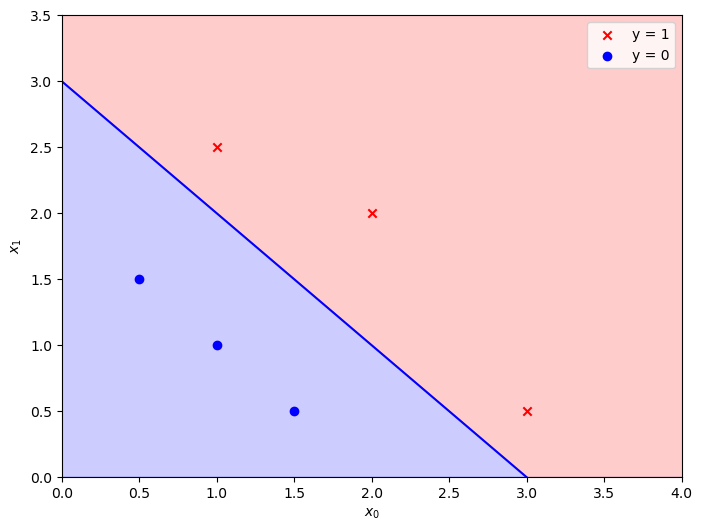

In [15]:
x0 = np.arange(0, 10)
x1 = 3 - x0

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.axis([0, 4, 0, 3.5])
ax.plot(x0, x1, color="blue")

ax.scatter(second_half[:, 0], second_half[:, 1], c="red", marker="x", label="y = 1")
ax.scatter(first_half[:, 0], first_half[:, 1], c="blue", marker="o", label="y = 0")

ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")

ax.fill_between(x=x0, y1=x1, y2=0, alpha=0.2, color="blue")
ax.fill_between(x=x0, y1=x1, y2=3.5, alpha=0.2, color="red")

plt.legend()
plt.show()

* In the plot above, the blue line represents the line $\quad x_0 + x_1 - 3 = 0 \quad$ and it should intersect the x1 axis at 3 (if we set $x_1$ = 3, $x_0$ = 0) and the x0 axis at 3 (if we set $x_1$ = 0, $x_0$ = 3):
    * The shaded region represents $\quad -3 + x_0 + x_1 < 0$
    * The region above the line is $\quad -3 + x_0 + x_1 > 0$
    * Any point in the shaded region (under the line) is classified as $\quad y=0$
    * Any point on or above the line is classified as $\quad y=1$



<br><hr><hr><br>

# Loss and Cost

<br><hr><br>

## Logistic Loss (Cost for a single Data Point)

* Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number
* It uses 2 separate curves:
    * One for the case when the target is 0
    * One for the case when the target is 1
* Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target

<br>

* The cost for a single data point is:

  $loss(f_{\mathbf{w}, b}(\mathbf{x}^{(i)}), y^{(i)}) =
\begin{cases}
- \log(1 - f_{\mathbf{w}, b}(\mathbf{x}^{(i)})), & \text{if } y^{(i)} = 0  \\[10pt]
- \log(f_{\mathbf{w}, b}(\mathbf{x}^{(i)})), & \text{if } y^{(i)} = 1
\end{cases}$

* Where:
    * $f_{\mathbf{w}, b} (\mathbf{x}^{(i)})$ = the model prediction.
    * $y^{(i)}$ = the target value.
    * $\log$ = natural logarithm.

<br>

* Implementation version:

  $loss(f_{\mathbf{w}, b}(\mathbf{x}^{(i)}), y^{(i)}) = - y^{(i)} \cdot \log(f_{\mathbf{w}, b}(\mathbf{x}^{(i)})) - (1 - y^{(i)}) \cdot \log(1 - f_{\mathbf{w}, b}(\mathbf{x}^{(i)}))$

<br>

* Replacing y with relevant values:

  $-(0) \cdot \log(f_{\mathbf{w}, b}(\mathbf{x}^{(i)})) - (1 - 0) \cdot \log(1 - f_{\mathbf{w}, b}(\mathbf{x}^{(i)})), \quad \text{for y = 0}$

  $-(1) \cdot \log(f_{\mathbf{w}, b}(\mathbf{x}^{(i)})) - (1 - 1) \cdot \log(1 - f_{\mathbf{w}, b}(\mathbf{x}^{(i)})), \quad \text{for y = 1}$

<br>

* After simplification:
  
  $\begin{cases}
- \log(1 - f_{\mathbf{w}, b}(\mathbf{x}^{(i)})), & \text{if } y^{(i)} = 0  \\[10pt]
- \log(f_{\mathbf{w}, b}(\mathbf{x}^{(i)})), & \text{if } y^{(i)} = 1
\end{cases}$


<br><hr><br>

## Cost function (Binary Cross-Entropy)


$$J(\mathbf{w}, b) = \frac{1}{m}  \sum\limits_{i = 0}^{m-1} [loss(f_{\mathbf{w}, b}(\mathbf{x}^{(i)},y^{(i)}]$$

* Where:
    * $loss(f_{\mathbf{w}, b}(\mathbf{x}^{(i)}), y^{(i)})$ = the cost for a single data point

    * $f_{\mathbf{w}, b}(\mathbf{x}^{(i)}) = g(z^{(i)})$
    
        * $z^{(i)} = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$
    
        * $g(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}$
    
    * $m$ = the number of examples in the data set

In [23]:
def compute_cost_logistic(X, y, w, b):
    """
    Args:
        x (vector) = data, m examples with n features
        y (vector) = target values
        w (scalar) = weight
        b (scalar) = bias

    Returns:
      cost (scalar) = cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = X[i] @ w + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost = cost / m
    return cost

In [24]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

weights = np.array([1, 1])
bias = -3
print(compute_cost_logistic(X_train, y_train, weights, bias))

0.36686678640551745


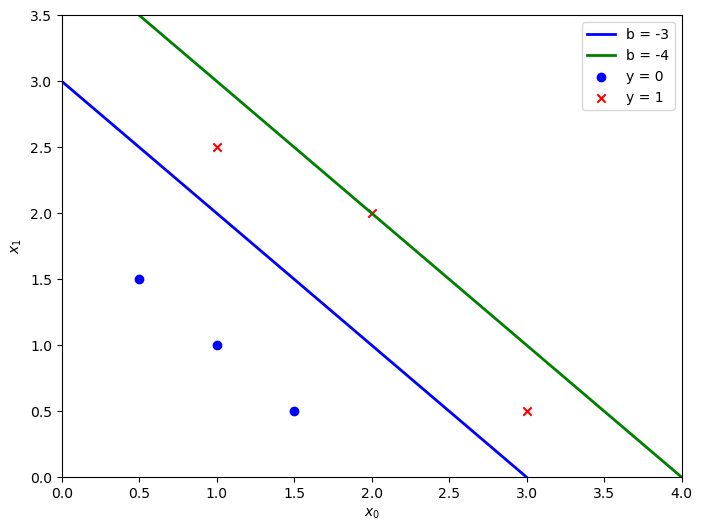

In [25]:
x0 = np.arange(0, 10)
x1 = 3 - x0
x2 = 4 - x0

# plot decision boundary graph
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.axis([0, 4, 0, 3.5])

ax.plot(x0, x1, color="blue", lw=2, label="b = -3")
ax.plot(x0, x2, color="green", lw=2, label="b = -4")

ax.scatter(first_half[:, 0], first_half[:, 1], c="blue", marker="o", label="y = 0")
ax.scatter(second_half[:, 0], second_half[:, 1], c="red", marker="x", label="y = 1")

ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")

plt.legend()
plt.show()

In [26]:
weights_1 = np.array([1, 1])
weights_2 = np.array([1, 1])
bias_1 = -3
bias_2 = -4

cost_bias_1 = compute_cost_logistic(X_train, y_train, weights_1, bias_1)
cost_bias_2 = compute_cost_logistic(X_train, y_train, weights_2, bias_2)

print(f"cost for b = -3: {cost_bias_1} -> better than -4", )
print(f"cost for b = -4: {cost_bias_2} -> worse than -3", )

cost for b = -3: 0.36686678640551745 -> better than -4
cost for b = -4: 0.5036808636748461 -> worse than -3


<br><hr><hr><br>

# Gradient Descent

$$\text{repeat until convergence: \{ }$$
<br>
\begin{aligned}
    &\qquad w = w - \alpha \frac{\partial J(w,b)}{\partial w_{j}} &\quad &\text{for } j = 0..n-1 \\
    \\
    &\qquad b = b - \alpha \frac{\partial J(w,b)}{\partial b} \\
    \\
    &\qquad \}
\end{aligned}
<br>

$$\text{Which becomes:}$$

<br>
$$\frac{\partial J(w,b)}{\partial w_{j}} = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w}, b}(\mathbf{x}^{(i)}) - y^{(i)})x^{(i)}_j$$
<br>
$$\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w}, b}(\mathbf{x}^{(i)}) - y^{(i)})$$

* Where:
    * $m$ = the number of training examples in the data set
    * $f_{\mathbf{w}, b}(\mathbf{x}^{(i)})$ = the model prediction
    * $y^{(i)}$ = target value

<br><hr><br>

## Compute Gradient Descent

In [31]:
def compute_gradient_logistic(X, y, w, b):
    """
    Args:
        X (vector) = features
        y (vector) = target values
        w (scalar) = weight
        b (scalar) = bias

    Returns:
        dj_dw (vector) = gradient of cost w.r.t. the parameters w
        dj_db (scalar) = gradient of cost w.r.t. the parameter b
    """

    m, n = X.shape
    dj_dw = np.zeros((n,))  # (n, )
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(X[i] @ w + b)  # (n, )(n, ) = scalar
        err_i = f_wb_i - y[i]  # scalar

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]  # scalar

        dj_db = dj_db + err_i

    dj_dw = dj_dw / m  # (n ,)
    dj_db = dj_db / m  # scalar

    return dj_db, dj_dw

In [32]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

weights = np.array([2., 3.])
bias = 1.

dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_train, y_train, weights, bias)

print(f"dj_db: {dj_db_tmp}")
print(f"dj_dw: {dj_dw_tmp}")

dj_db: 0.49861806546328574
dj_dw: [0.49833339 0.49883943]


<br><hr><br>

## Gradient Descent Operation

In [35]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """ x (vector) = features
        y (vector) = target values
        w_in (scalar) = initial weight value
        b_in (scalar) = initial bias value
        alpha (float) = learning rate
        num_iters (int) = count of iterations to run gradient descent

        returns:
        w (scalar): updated value of w
        b (scalar): updated value of b
        j_logs (List): log of cost values
    """

    # an array to store cost J and w's at each iteration primarily for graphing later
    j_logs = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # save cost J at each iteration
        if i < 100000:
            j_logs.append(compute_cost_logistic(X, y, w, b))

        # print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"iteration {i:4d}: cost {j_logs[-1]}")

    return w, b, j_logs  # return final w,b and J history for graphing

iteration    0: cost 0.684610468560574
iteration 10000: cost 0.01711604647887364
iteration 20000: cost 0.008523403979166485
iteration 30000: cost 0.005672197191107651
iteration 40000: cost 0.004250161053834308
iteration 50000: cost 0.003398230224179212
iteration 60000: cost 0.00283084256010047
iteration 70000: cost 0.002425848306579758
iteration 80000: cost 0.0021222573122028584
iteration 90000: cost 0.0018862216652143864

updated parameters: w:[8.35313087 8.15226727], b:-22.690605796630248


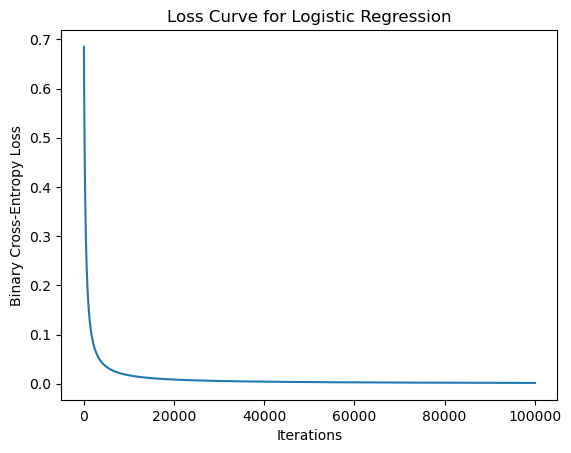

In [36]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

weights = np.zeros_like(X_train[0])
bias = 0.
alpha = 0.1
iters = 100000

w_out, b_out, loss_history = gradient_descent(X_train, y_train, weights, bias, alpha, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss Curve for Logistic Regression")
plt.show()


<br><hr><hr><br>

# Overfitting

* When a model learns the training data too well, capturing noise and random fluctuations instead of the actual pattern, it means it's overfitting:
    * This leads to poor performance on unseen data because the model has become too specialized to the training set

<br>

* <b>How to identify overfitting: </b>
    * High accuracy on training data, but low accuracy on test/validation data
    * The model is too complex, with too many parameters relative to the amount of training data
    * The loss on the training set continues decreasing, but the validation loss starts increasing

<br>

* <b>Causes of overfitting:</b>
    * <u>Too many features:</u> The model learns noise instead of general patterns
    * <u>Too few training examples:</u> The model memorizes data raher than generalizing
    * <u>Too complex model:</u>
        * Deep neural networks with excessive layers

<br>

* <b>How to prevent overfitting:</b>
    * <u>Regularization:</u>
        * L1 (Lasso) - shrinks some coefficients to 0, acting as feature selection
        * L2 (Ridge) - shrinks
    * <u>Train more data:</u> Helps the model generalize better and reduces the chance of memorization
    * <u>Cross-Validation:</u> Helps assess the model performance on different subsets of data
    * <u>Feature Selection:</u> Remove irrelevant or redundant features to reduce complexity
    * <u>Neural Network Dropout:</u> Randomly drops some neurons during training to prevent dependency on specific features
    * <u>Early Stopping:</u> Monitor validation loss and stop training when it starts increasing
    * <u>Data augmentation:</u> For image data, augmenting by flipping, rotating, or altering brightness helps the model learn more general features


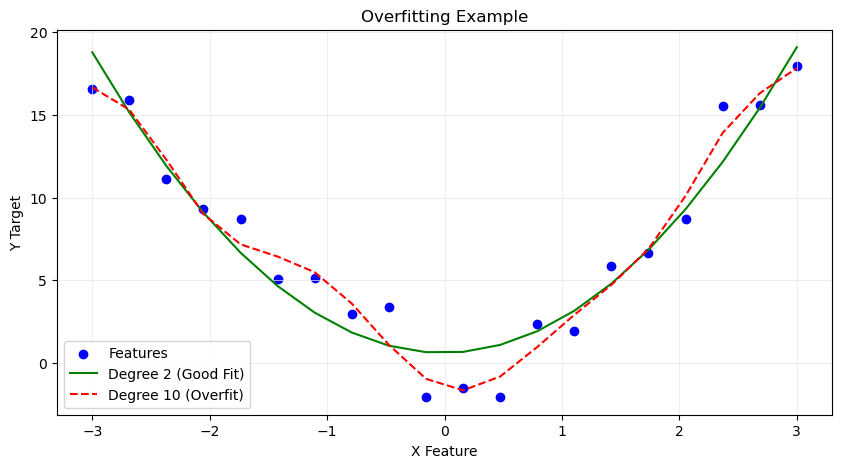

In [39]:
# generate synthetic data
np.random.seed(13)
x = np.linspace(-3, 3, 20)
y = 2 * x ** 2 + np.random.randn(20) * 2  # quadratic relationship with noise

# fit to 2-D and 10-D polynomials
goodfit = np.poly1d(np.polyfit(x=x, y=y, deg=2))
overfit = np.poly1d(np.polyfit(x=x, y=y, deg=10))

x_range = np.linspace(-3, 3, 20)  # fine-grained x values for smooth plotting

plt.figure(figsize=(10, 5))
plt.title("Overfitting Example")
plt.xlabel("X Feature")
plt.ylabel("Y Target")

plt.scatter(x, y, label="Features", color="blue")
plt.plot(x_range, goodfit(x_range), label="Degree 2 (Good Fit)", color="green")
plt.plot(x_range, overfit(x_range), label="Degree 10 (Overfit)", color="red", ls="dashed")

plt.grid(color="0.9", lw=0.5)
plt.legend()
plt.show()

<br><hr><br>

## -- TODO Regularization

<br><hr><hr><br>